In [2]:
# this component loads the data from the csv in raw_data and clean it
# the cleaned data is saved in the clean_data folder
# the cleaned data is used by the model component

import pandas as pd
import numpy as np
import os
import json

# load the data from raw_data
file_names = os.listdir('raw_data')
print(file_names)

['22_salon.csv', '22_puffs.csv', '.gitkeep', '24.csv', 'cibersec.csv', '13.csv', '23.csv', '14.csv']


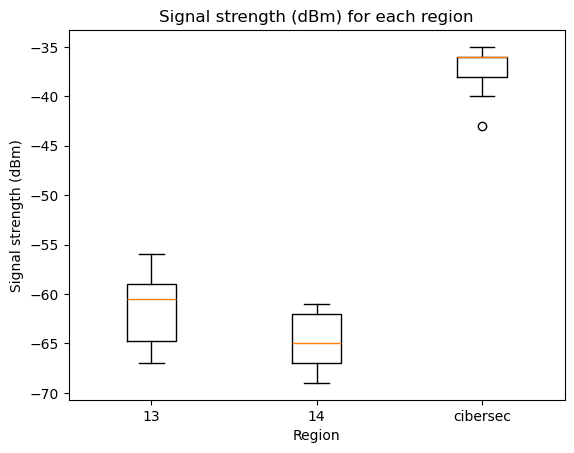

In [3]:
# dataframes for regions that start with 1 and only load the column Signal strength (dBm)
# df_13 = pd.read_csv('raw_data/13.csv')
# df_14 = pd.read_csv('raw_data/14.csv')
# df_cibersec = pd.read_csv('raw_data/cibersec.csv')
df_13 = pd.read_csv('raw_data/13.csv', usecols=['Signal strength (dBm)'])
df_14 = pd.read_csv('raw_data/14.csv', usecols=['Signal strength (dBm)'])
df_cibersec = pd.read_csv('raw_data/cibersec.csv', usecols=['Signal strength (dBm)'])

# signal strenght is a string of the form '-xx dBm'	where xx is a number. I want to remove the ' dBm' part
# and convert the string to a number
df_13['Signal strength (dBm)'] = df_13['Signal strength (dBm)'].map(lambda x: int(x.split(' ')[0]))
df_14['Signal strength (dBm)'] = df_14['Signal strength (dBm)'].map(lambda x: int(x.split(' ')[0]))
df_cibersec['Signal strength (dBm)'] = df_cibersec['Signal strength (dBm)'].map(lambda x: int(x.split(' ')[0]))


import matplotlib.pyplot as plt
# print the 3 groups of data in a boxplot
plt.boxplot([df_13['Signal strength (dBm)'], df_14['Signal strength (dBm)'], df_cibersec['Signal strength (dBm)']])
plt.xticks([1, 2, 3], ['13', '14', 'cibersec'])
plt.ylabel('Signal strength (dBm)')
plt.xlabel('Region')
plt.title('Signal strength (dBm) for each region')
plt.savefig('plots/boxplot_regions1.png')


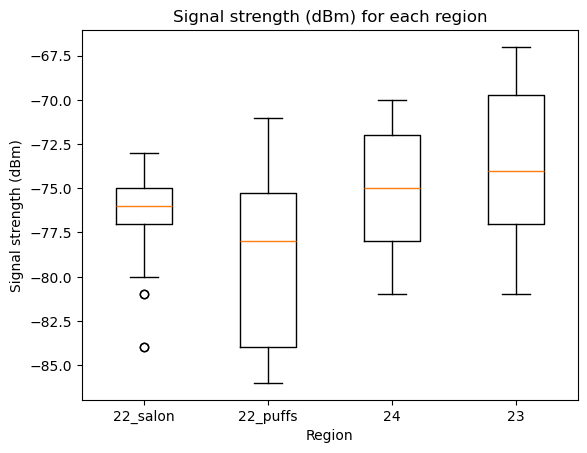

In [4]:
# do the same for the regions that start with 2: 22_salon, 22_puffs, 24, 23
df_22_salon = pd.read_csv('raw_data/22_salon.csv', usecols=['Signal strength (dBm)'])
df_22_puffs = pd.read_csv('raw_data/22_puffs.csv', usecols=['Signal strength (dBm)'])
df_24 = pd.read_csv('raw_data/24.csv', usecols=['Signal strength (dBm)'])
df_23 = pd.read_csv('raw_data/23.csv', usecols=['Signal strength (dBm)'])

df_22_salon['Signal strength (dBm)'] = df_22_salon['Signal strength (dBm)'].map(lambda x: int(x.split(' ')[0]))
df_22_puffs['Signal strength (dBm)'] = df_22_puffs['Signal strength (dBm)'].map(lambda x: int(x.split(' ')[0]))
df_24['Signal strength (dBm)'] = df_24['Signal strength (dBm)'].map(lambda x: int(x.split(' ')[0]))
df_23['Signal strength (dBm)'] = df_23['Signal strength (dBm)'].map(lambda x: int(x.split(' ')[0]))

plt.boxplot([df_22_salon['Signal strength (dBm)'], df_22_puffs['Signal strength (dBm)'], df_24['Signal strength (dBm)'], df_23['Signal strength (dBm)']])
plt.xticks([1, 2, 3, 4], ['22_salon', '22_puffs', '24', '23'])
plt.ylabel('Signal strength (dBm)')
plt.xlabel('Region')
plt.title('Signal strength (dBm) for each region')
plt.savefig('plots/boxplot_regions2.png')

In [5]:
# show statistics for the region 1
print(df_13.describe())
print(df_14.describe())
print(df_cibersec.describe())

       Signal strength (dBm)
count              26.000000
mean              -61.230769
std                 3.744945
min               -67.000000
25%               -64.750000
50%               -60.500000
75%               -59.000000
max               -56.000000
       Signal strength (dBm)
count              36.000000
mean              -64.805556
std                 2.659962
min               -69.000000
25%               -67.000000
50%               -65.000000
75%               -62.000000
max               -61.000000
       Signal strength (dBm)
count              33.000000
mean              -36.939394
std                 1.675921
min               -43.000000
25%               -38.000000
50%               -36.000000
75%               -36.000000
max               -35.000000


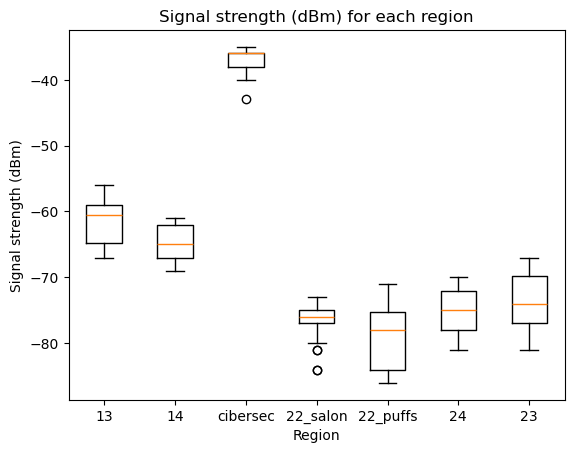

In [6]:
# plot both regions 1 and 2 in the same boxplot
plt.boxplot([df_13['Signal strength (dBm)'], df_14['Signal strength (dBm)'], df_cibersec['Signal strength (dBm)'], df_22_salon['Signal strength (dBm)'], df_22_puffs['Signal strength (dBm)'], df_24['Signal strength (dBm)'], df_23['Signal strength (dBm)']])
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['13', '14', 'cibersec', '22_salon', '22_puffs', '24', '23'])
plt.ylabel('Signal strength (dBm)')
plt.xlabel('Region')
plt.title('Signal strength (dBm) for each region')
plt.savefig('plots/boxplot_regions.png')



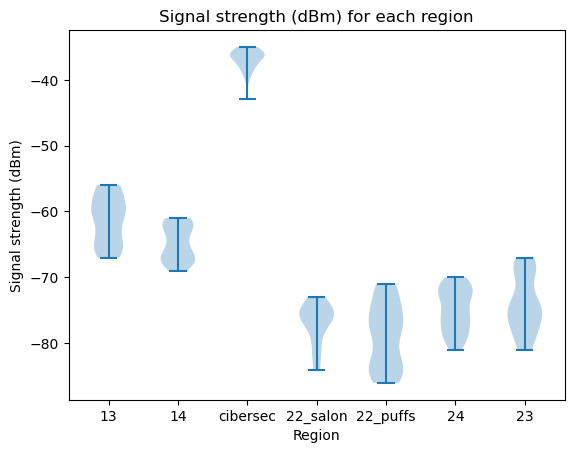

In [7]:
# now do it with a violin plot
plt.violinplot([df_13['Signal strength (dBm)'], df_14['Signal strength (dBm)'], df_cibersec['Signal strength (dBm)'], df_22_salon['Signal strength (dBm)'], df_22_puffs['Signal strength (dBm)'], df_24['Signal strength (dBm)'], df_23['Signal strength (dBm)']])
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['13', '14', 'cibersec', '22_salon', '22_puffs', '24', '23'])
plt.ylabel('Signal strength (dBm)')
plt.xlabel('Region')
plt.title('Signal strength (dBm) for each region')
plt.savefig('plots/violinplot_regions.png')


In [8]:
# save the dataframes in the clean_data folder
df_13.to_csv('clean_data/13.csv')
df_14.to_csv('clean_data/14.csv')
df_cibersec.to_csv('clean_data/cibersec.csv')
df_22_salon.to_csv('clean_data/22_salon.csv')
df_22_puffs.to_csv('clean_data/22_puffs.csv')
df_24.to_csv('clean_data/24.csv')
df_23.to_csv('clean_data/23.csv')
#print the files in the clean_data folder
print(os.listdir('clean_data'))

['22_salon.csv', '22_puffs.csv', '.gitkeep', '24.csv', 'cibersec.csv', '13.csv', '23.csv', '14.csv']
